In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel("patient_level__ver 12_proj1_sn_5-13.xlsx")

In [3]:
def plot_median(df1, group, num_of_days, state, kg):
    X = range(num_of_days)
    Y = []
    std = []
    for i in X:
        if not kg:
            Y.append(df1[group+str(i)].median())
            std.append(df1[group+str(i)].std())
        else:
            Y.append(df1[group+str(i)+"/kg"].median())
            std.append(df1[group+str(i)+"/kg"].std())
            

    X = np.array(X)
    Y = np.array(Y)
    std = np.array(std)

    if not kg:
        title = "Median of " + group + " for " + str(num_of_days) + " days - " + state
    else:
        title = "Median of " + group + "/kg" + " for " + str(num_of_days) + " days - " + state
        
    plt.title(title)
    plt.xlabel("Days")
    plt.ylabel(group)

    plt.fill_between(X, Y-std, Y+std, alpha=.3)
    plt.plot(X,Y)
    

In [4]:
def plot_median_both(df1, df2, group, num_of_days, kg):
    X = range(num_of_days)
    Y = []
    for i in X:
        if not kg:
            Y.append(df1[group+str(i)].median())
        else:
            Y.append(df1[group+str(i)+"/kg"].median())
    
    Y2 = []
    for i in X:
        if not kg:
            Y2.append(df2[group+str(i)].median())
        else:
            Y2.append(df2[group+str(i)+"/kg"].median())

    X = np.array(X)
    Y = np.array(Y)

    if not kg:
        title = "Median of " + group + " for " + str(num_of_days) + " days - Both" 
    else:
        title = "Median of " + group + "/kg" + " for " + str(num_of_days) + " days - Both" 
        
    plt.title(title)
    plt.xlabel("Days")
    plt.ylabel(group)

    plt.plot(X, Y, X, Y2)

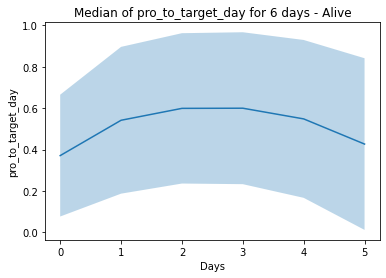

In [5]:
group = "pro_to_target_day"
df_alive = df[df["ICU_mortality"] == 0]
plot_median(df_alive, group, 6, "Alive", False)

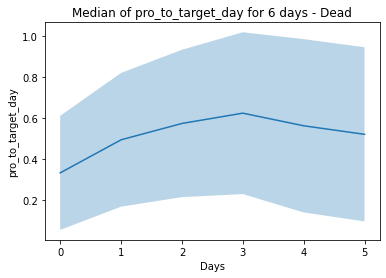

In [6]:
df_dead = df[df["ICU_mortality"] == 1]
plot_median(df_dead, group, 6, "Dead", False)

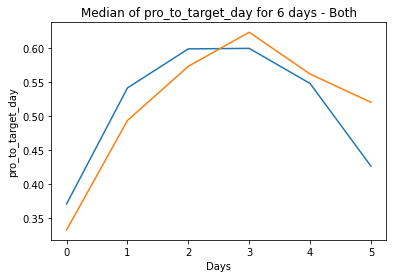

In [7]:
plot_median_both(df_alive, df_dead, group, 6, False)

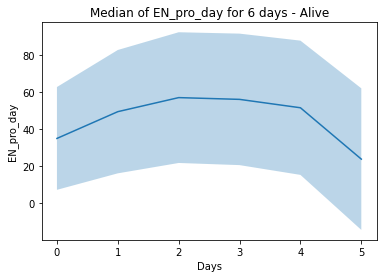

In [8]:
group = "EN_pro_day"
plot_median(df_alive, group, 6, "Alive", False)

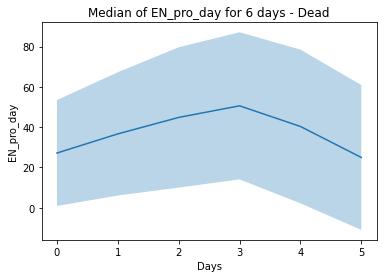

In [9]:
plot_median(df_dead, group, 6, "Dead", False)

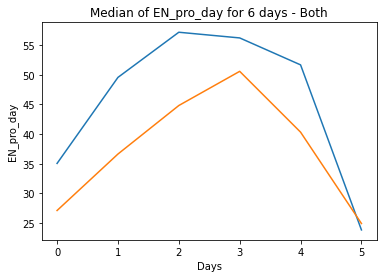

In [10]:
plot_median_both(df_alive, df_dead, group, 6, False)

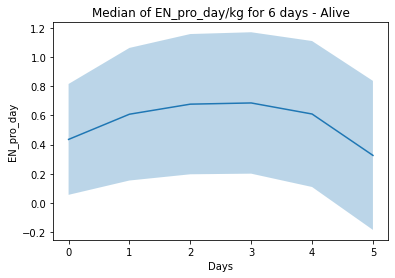

In [11]:
group = "EN_pro_day"
plot_median(df_alive, group, 6, "Alive", True)

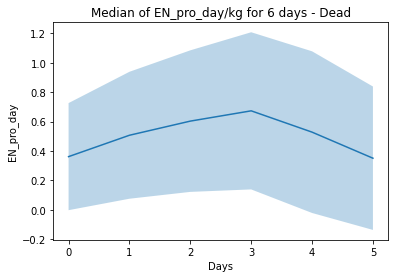

In [12]:
plot_median(df_dead, group, 6, "Dead", True)

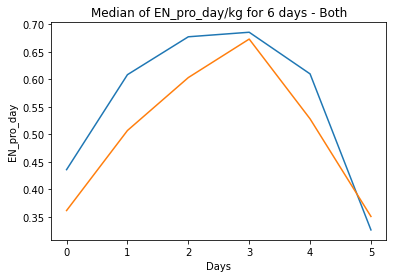

In [13]:
plot_median_both(df_alive, df_dead, group, 6, True)